<a href="https://colab.research.google.com/github/bforoura/AI/blob/main/Module4/func_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Function Optimization with Genetic Algorithms**

* Main Idea: Evolve the best possible solution from random elements.

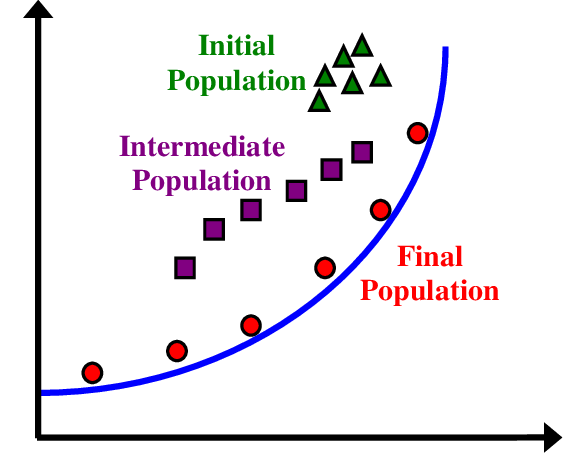

# **Steps:**

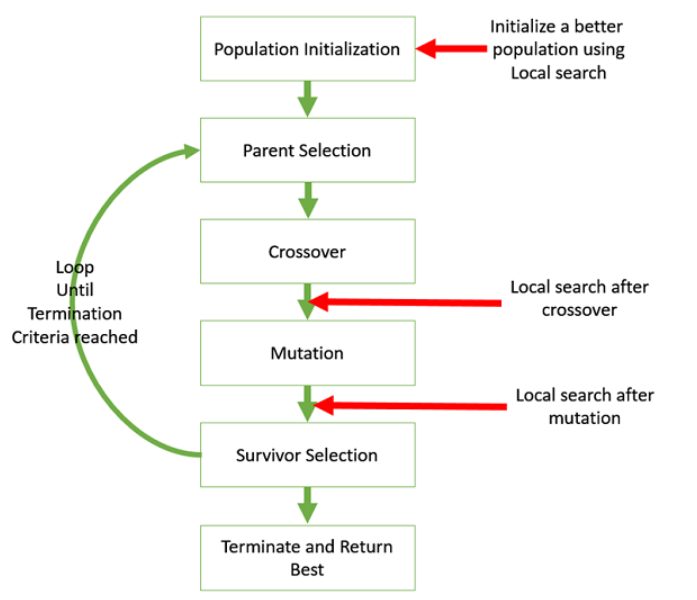


In [24]:
# genetic algorithms
install.packages('GA')

# statistical graphics
install.packages('ggplot2')

# used to create plots and charts, including line charts
# scatter plots, bar charts , histograms, etc.
install.packages('plotly')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
# Loading the needed libraries

library(GA)
library(plotly)

## **Example 1: Single Parameter**

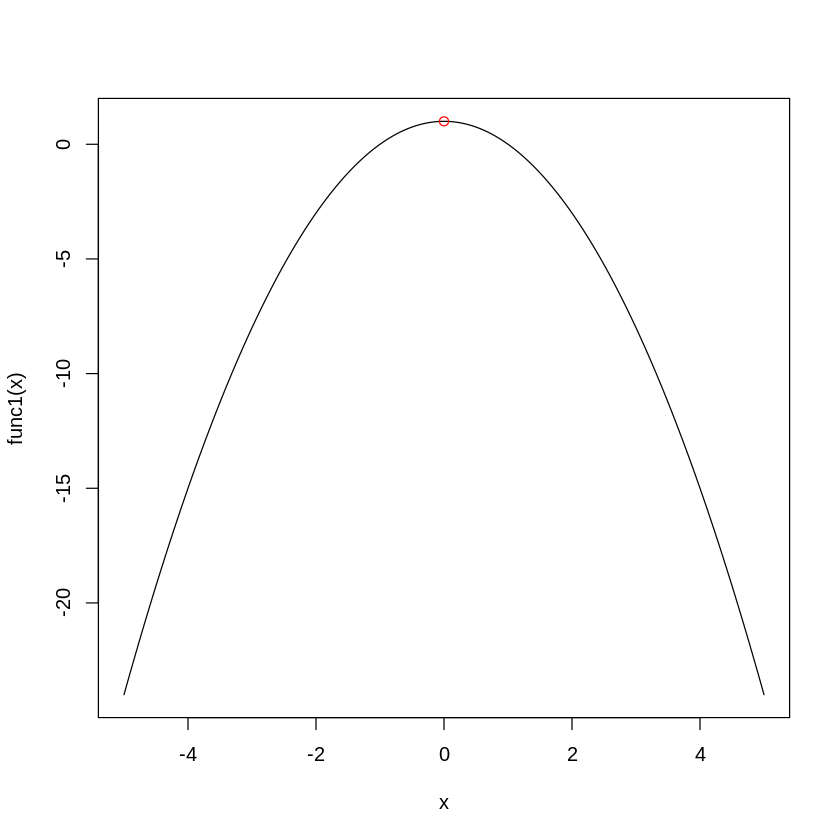

In [37]:
#@title Function definition
func1 <- function(x)  (1 - x^2)

# parameter range
lbound <- -5; ubound <- 5

# Run GA as a real-valued optimizer
GA <- ga(type = "real-valued", fitness = func1, lower = c(th = lbound), upper = ubound)

# Graph the function
curve(func1, from = lbound, to = ubound, n = 1000)

# Identify the best solution on the
points(GA@solution, GA@fitnessValue, col = 'red')



# **GA Parameters**:

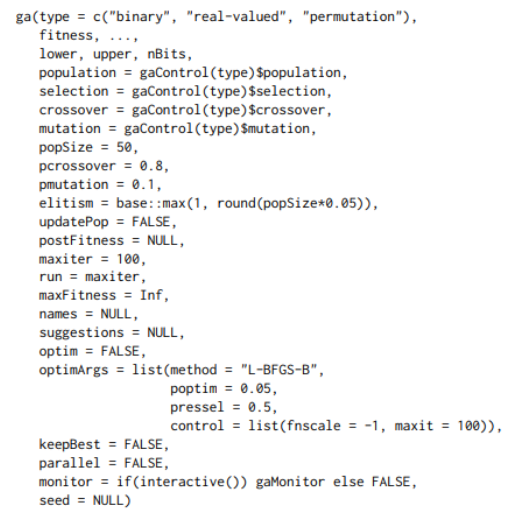

## **Encoding Methods:**

* **Binary Encoding**: Most common methods of encoding. Chromosomes are string of 1s and 0s and each position in the chromosome represents a particular characteristics of the solution.
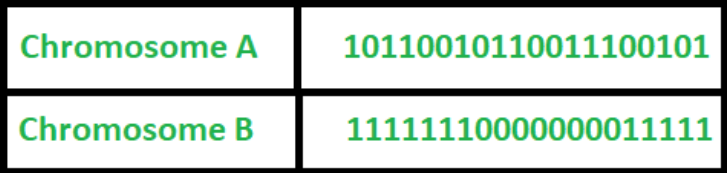

* **Permutation Encoding**: Useful in ordering such as the Travelling Salesman Problem (TSP). In TSP, every chromosome is a string of numbers, each of which represents a city to be visited.
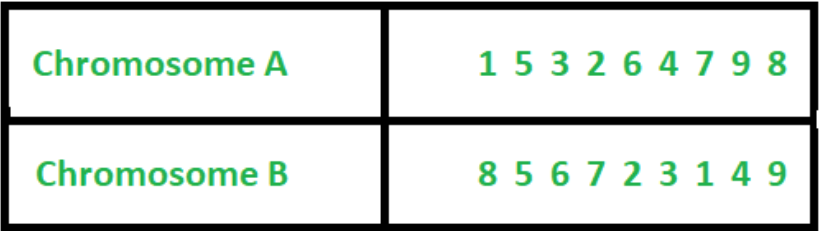

* **Value Encoding**: Used in problems where complicated values, such as real numbers, are used and where binary encoding would not suffice. Good for some problems, but often necessary to develop some specific crossover and mutation techniques for these chromosomes.
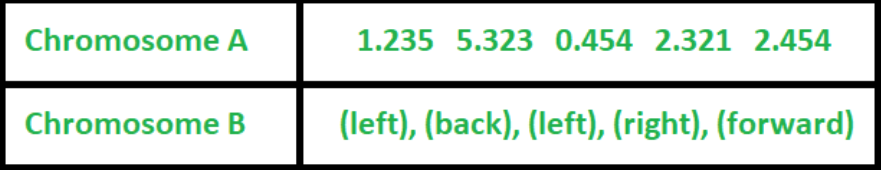


## **Example 2: Minimization of a Multi-Parameter Function**

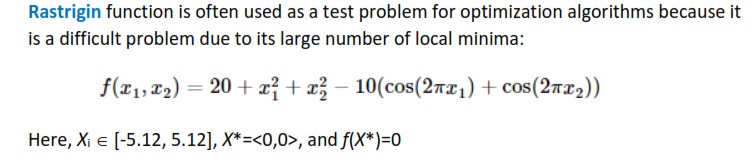

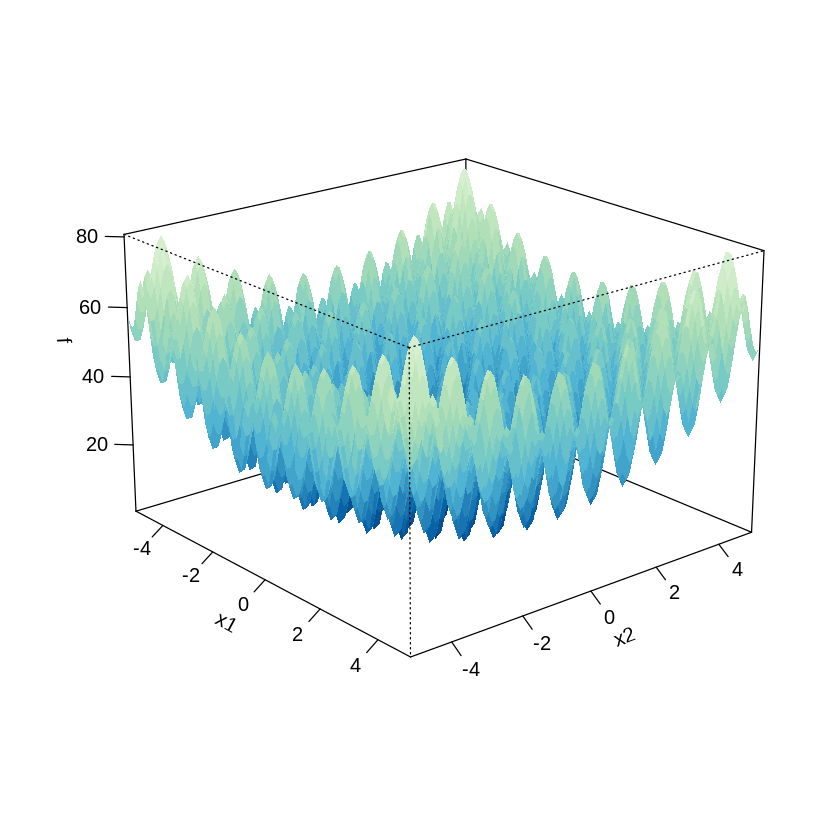

In [55]:
# The Rastrigin function

func2 <- function(x1, x2)
{
  20 + x1^2 + x2^2 - 10*(cos(2*pi*x1) + cos(2*pi*x2))
}

# Parameters constraints
x1 <- x2 <- seq(-5.12, 5.12, by = 0.1)

# The outer() function creates a new array or matrix by applying a function to
# all possible combinations of items from two input vectors.
f <- outer(x1, x2, func2)

persp3D(x1, x2, f, theta = 50, phi = 20, col.palette = bl2gr.colors)



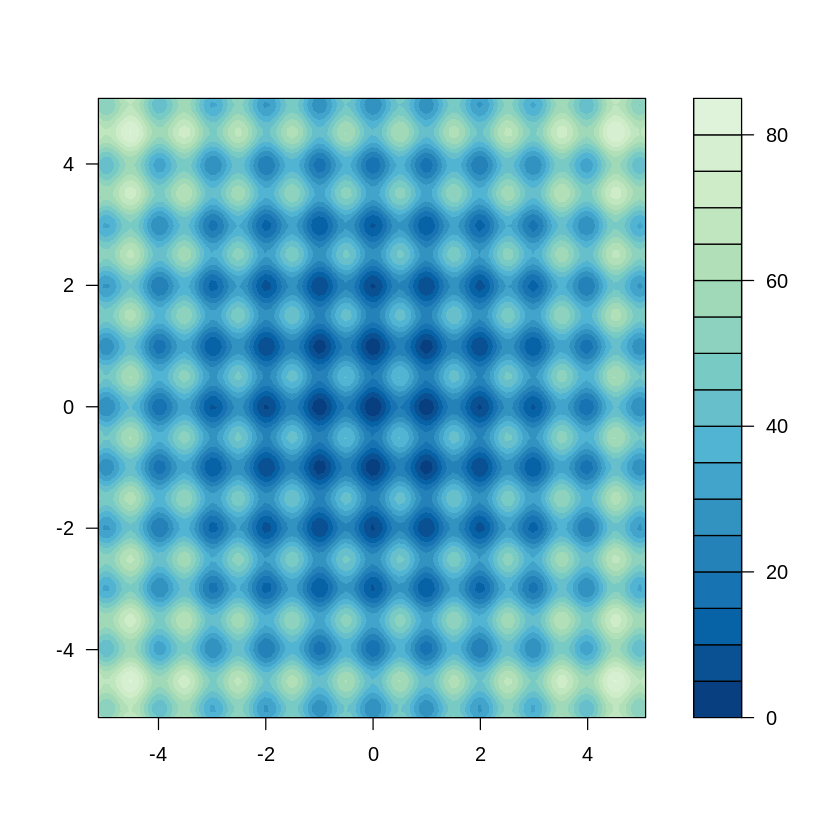

In [44]:
filled.contour(x1, x2, f, color.palette = bl2gr.colors)


── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  50 
Number of generations =  1000 
Elitism               =  2 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
         x1    x2
lower -5.12 -5.12
upper  5.12  5.12

GA results: 
Iterations             = 344 
Fitness function value = -2.146376e-07 
Solution = 
                x1            x2
[1,] -3.259846e-05 -4.384775e-06

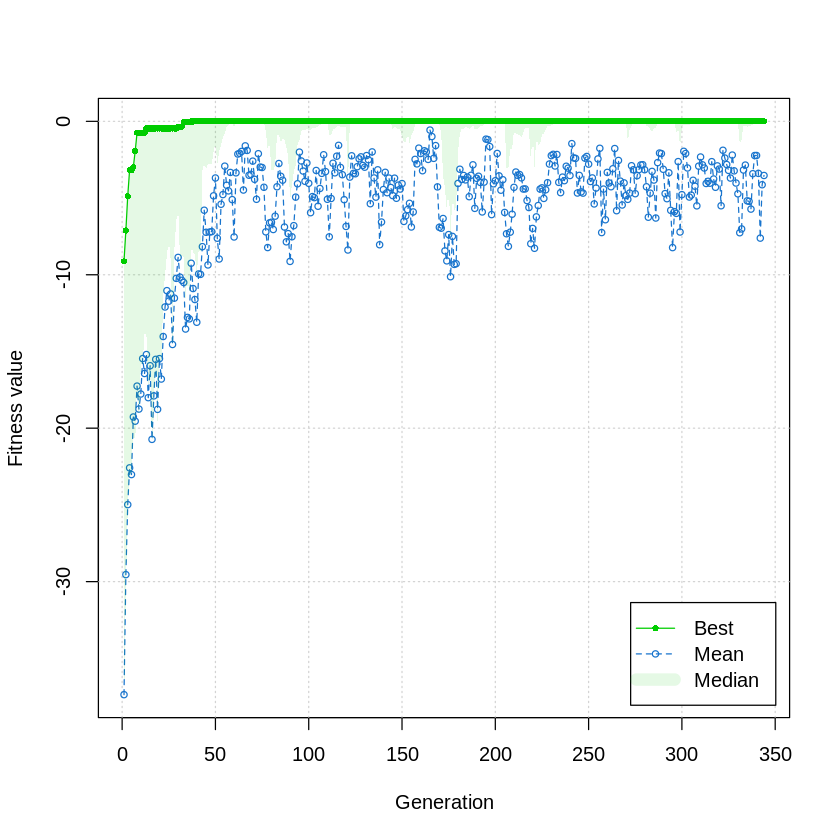

In [54]:
# Multiple func2 by -1 to minimize the function

GA <- ga(type = "real-valued",
         fitness =  function(x) -func2(x[1], x[2]),
         lower = c(-5.12, -5.12), upper = c(5.12, 5.12),
         popSize = 50, maxiter = 1000, run = 100)

summary(GA)

plot(GA)


## **Example 3: Maximization of a Multi-Parameter Function**

── Genetic Algorithm ─────────────────── 

GA settings: 
Type                  =  real-valued 
Population size       =  1000 
Number of generations =  200 
Elitism               =  50 
Crossover probability =  0.8 
Mutation probability  =  0.1 
Search domain = 
        x1  x2
lower -3.0 4.1
upper 12.1 5.8

GA results: 
Iterations             = 200 
Fitness function value = 38.75592 
Solution = 
           x1       x2
[1,] 11.63564 5.724761

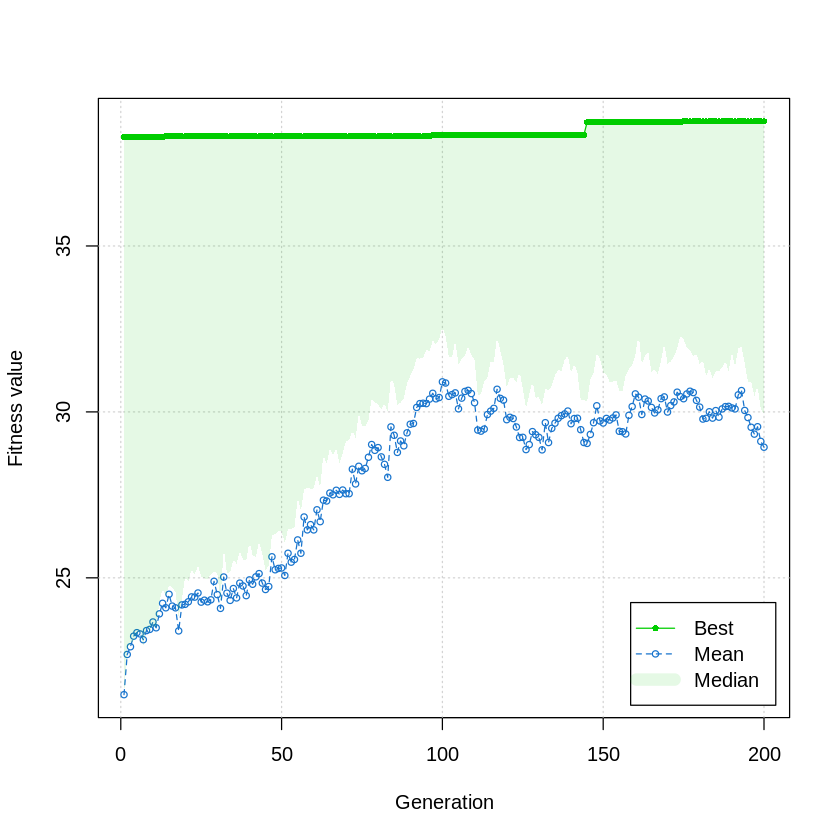

In [58]:
#  Define the function to be optimized
func3 = function(x1, x2)
{
  21.5 + x1*sin(4*pi*x1) + x2*sin(20*pi*x2)
}

# Set lower & upper bound; step size determines precision
x1 = seq(-3, 12.1, by = 0.1)
x2 = seq(4.1, 5.8, by = 0.1)


# Applied Genetic Algorithm
GA = ga(type = "real-valued",
        fitness = function(x) func3(x[1], x[2]),
        lower = c(-3, 4.1), upper = c(12.1, 5.8),
        popSize = 1000, maxiter = 200, run = 100)

summary(GA)

plot(GA)

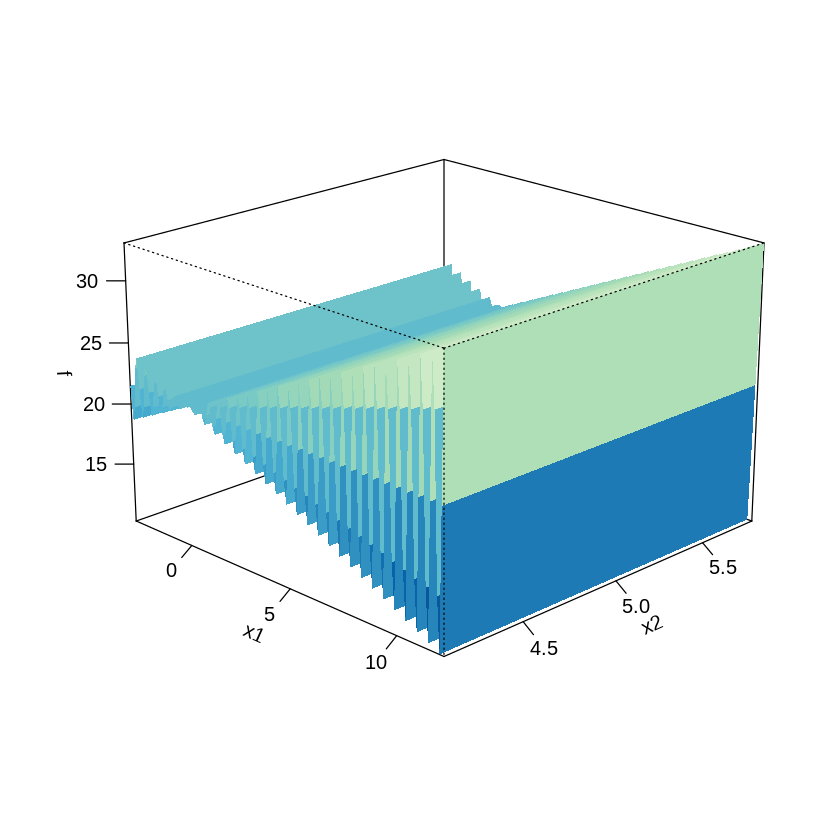

In [65]:
x1 = seq(-3, 12.1, by = 0.1)
x2 = seq(4.1, 5.8, by = 0.1)

# The outer() function creates a new array or matrix by applying a function to
# all possible combinations of items from two input vectors.
f <- outer(x1, x2, func3)

persp3D(x1, x2, f, theta = 45, phi = 20, col.palette = bl2gr.colors)
